###Q1. To start with, we'll need to compute the number of rentals per station per day. Use pandas to do that.

In [51]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Lasso
import seaborn as sns

In [52]:
%matplotlib inline
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (14.0, 6.0)

In [53]:
usage = pd.read_table('data/usage_2012.tsv')

In [54]:
stations = pd.read_table('data/stations.tsv')

In [55]:
s = stations[['station']]

In [56]:
u = pd.concat([usage['station_start']], axis=1, keys=['station'])

In [57]:
counts = u['station'].value_counts()

In [58]:
c = DataFrame(counts.index, columns=['station'])

In [59]:
c['counts'] = counts.values

In [60]:
c['counts'] = c['counts'].apply(lambda x: x / 366)

In [61]:
m = pd.merge(s, c, on='station')

In [62]:
m.head()

,station,counts
0,20th & Bell St,4
1,20th & Crystal Dr,13
2,15th & Crystal Dr,8
3,Aurora Hills Community Ctr/18th & Hayes St,5
4,Pentagon City Metro / 12th & S Hayes St,11


###Q2.
###a. Our stations data has a huge number of quantitative attributes: fast_food, parking, restaurant, etc... Some of them are encoded as 0 or 1 (for absence or presence), others represent counts. To start with, run a simple linear regression where the input (x) variables are all the various station attributes and the output (y) variable is the average number of rentals per day.

In [63]:
stations_data = stations.merge(m, on='station')

In [64]:
df = DataFrame(stations_data.index, columns=['station'])
df['avg_rentals'] = m[['counts']]
df['station'] = m[['station']]
stations_vals = pd.merge(left=df, right=stations, on='station')

In [65]:
stations_vals.head()

,station,avg_rentals,id,terminal_name,lat,long,no_bikes,no_empty_docks,fast_food,parking,...,museum,sculpture,hostel,picnic_site,tour_guide,attraction,landmark,motel,guest_house,gallery
0,20th & Bell St,4,1,31000,38.856100,-77.051200,7,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20th & Crystal Dr,13,3,31002,38.856400,-77.049200,9,6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15th & Crystal Dr,8,4,31003,38.860170,-77.049593,4,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aurora Hills Community Ctr/18th & Hayes St,5,5,31004,38.857866,-77.059490,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pentagon City Metro / 12th & S Hayes St,11,6,31005,38.862303,-77.059936,8,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
x = stations_vals[list(stations_vals.columns.values[8:])]
y = stations_vals[list(stations_vals.columns.values[1:2])]

In [67]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###b. Plot the predicted values (model.predict(x)) against the actual values and see how they compare.

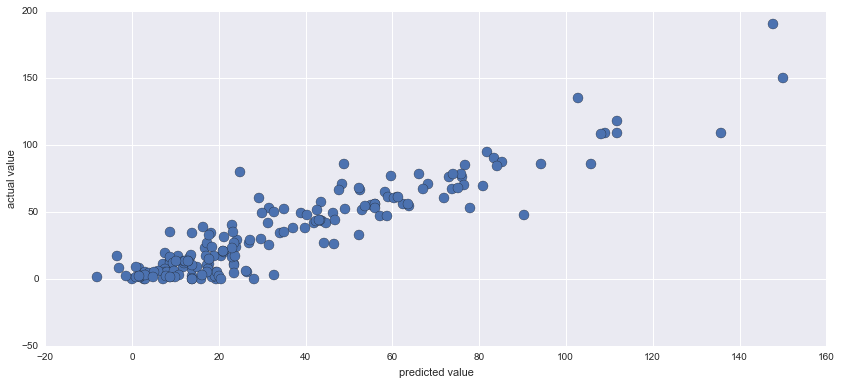

In [68]:
plt.scatter(lin_regr.predict(x), y, s=100)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

####Everything here tends to fit very well in a 1 to 1 relationship, but this not an accurate predictive model because we have not trained the regression model.

###c. In this case, there are 129 input variables and only 185 rows which means we're very likely to overfit. Look at the model coefficients and see if anything jumps out as odd.

In [69]:
np.round(lin_regr.coef_, 1)

array([[  2.30000000e+00,  -3.00000000e-01,   1.00000000e-01,
         -6.23000000e+01,   2.00000000e+00,  -4.20000000e+00,
          5.60000000e+00,   1.80000000e+00,  -4.00000000e-01,
          0.00000000e+00,   2.40000000e+00,   6.89000000e+01,
          4.50000000e+00,  -0.00000000e+00,  -0.00000000e+00,
          5.20000000e+00,  -0.00000000e+00,   4.40000000e+00,
          9.30000000e+00,  -3.00000000e+00,   3.20000000e+00,
         -3.75000000e+01,   2.79000000e+01,  -3.85000000e+01,
         -1.59000000e+01,   2.17000000e+01,   1.50000000e+00,
          3.00000000e+00,  -4.30000000e+00,   8.90000000e+00,
          2.17000000e+01,  -3.00000000e-01,   3.40000000e+00,
          1.28000000e+01,   4.80000000e+00,  -2.00000000e+00,
         -3.45000000e+01,  -1.62000000e+01,   5.30000000e+00,
          5.20000000e+00,   1.13000000e+01,  -6.00000000e+00,
          1.47300000e+02,  -5.50000000e+00,  -1.29000000e+01,
          1.82600000e+02,  -1.00000000e-01,   4.00000000e-01,
        

####There are few coefficients that are much larger than the others.

###d. Go back and split the data into a training set and a test set. Train the model on the training set and evaluate it on the test set. How does it do?

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [71]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

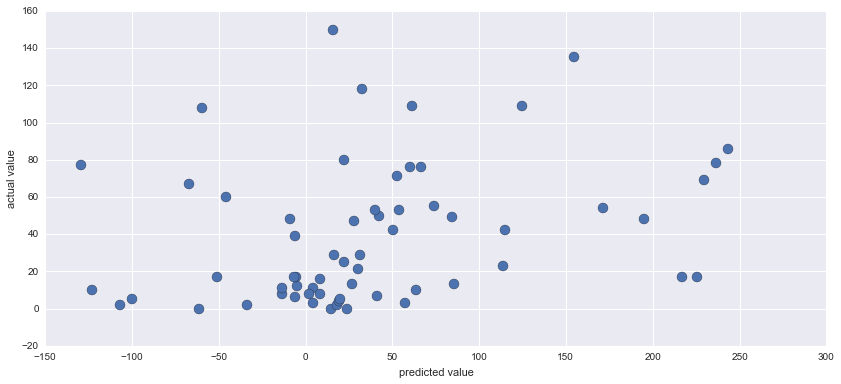

In [72]:
plt.scatter(lin_regr.predict(x_test), y_test, s=100)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

####This does not perform very well. There a handful outliers scattered around the trending data points, some of which are showing negative predictions.

###Q1.
###a. Since we have so many variables, this is a good candidate for regularization. In particular, since we'd like to eliminate a lot of them, lasso seems like a good candidate. Build a lasso model on your training data for various values of alpha. Which variables survive?

In [73]:
lasso_model = Lasso(alpha=0.15)
lasso_model.fit(x_train, y_train)
np.round(lasso_model.coef_, 1)

array([  2.1,  -1.5,   0.7,   0. ,  -4.3,  -0.2,   8.7,   0. ,  -0.1,
         0. ,  -0.3,   0. ,  -1. ,   0. ,   0. ,   0. ,   0. ,  -2. ,
         0. ,  -0.4,  -0.2,   2.6,   3.8,  -6.7,  -0. ,  -0. ,  -3.7,
         3. ,   8.7,   0.5,  -0. ,  -0. ,   0.6,   5.6,   3.2,   0. ,
         0. , -12.1,  -0. ,  -0. ,  -3. ,   3.3,  59.9,   0. ,  -2.5,
        17.7,   5.5,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,   0. ,
         0. ,   6.2,  18.5,   0. ,   0. ,   0. ,   0.1,   0. ,   0. ,
         0. ,  -0. ,   0. ,   0. ,   0. ,   0. ,  -0. ,   0. ,  -0. ,
        -1.9,  -0. ,  -2.5,  -0. ,  -0. ,  -0. ,  -0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,  -0. ,  -0. ,  -0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,  -0.2,   0.4,  -1.5,  -0. ,   9.5,   0. ,
        -1.1,  -3. ,   0. ,   0. ,  -6.1,  -0. ,  -0. ,   0. ,  13.1,
        -0.7,  -0. ,  -2.7,   0. ,   0. ,   0. ,   0. ,  -0. ,  -1. ,
        -0. ,  -0. ,

In [74]:
lasso_model = Lasso(alpha=200)
lasso_model.fit(x_train, y_train)
np.round(lasso_model.coef_, 1)

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. , -0. ,  0. ,  0. ,  0. ,  0. , -0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. , -0. ,  0. , -0. ,  0. ,  0. ,  0. ,  0. , -0. ,  0. ,
        0. ,  0. , -0. ,  0. ,  0. , -0. , -0. ,  0. ,  0. ,  0. ,  0. ,
       -0. ,  0. ,  0. , -0. , -0. , -0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. , -0. , -0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. , -0. , -0. ,  0. , -0. , -0. ,  0. , -0. , -0. , -0. ,
       -0. ,  0. , -0. , -0. ,  0. ,  0. , -0. , -0. , -0. , -0. , -0. ,
        0. ,  0. , -0. ,  0. , -0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0.3, -0. ,  0. ,  0. ,  0. , -0. , -0. ,
        0. ,  0. , -0. , -0. , -0. ,  0. ,  0. ,  0. , -0. ,  0. ,  0. ,
        0. ,  0. ,  0. , -0. , -0. , -0. , -0. ,  0. ])

####This case shows that 104th input, "crossings", is the last piece of data to approach zero as alpha is increased.

In [75]:
lasso_model = Lasso(alpha=10)
lasso_model.fit(x_train, y_train)
np.round(lasso_model.coef_, 1)

array([ 0. , -0. ,  1.4,  0. , -0. , -0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. , -0. ,  0. ,  0. ,  0. ,  0. , -0. ,  0. , -0. ,  0. ,  0. ,
        0. , -0. , -0. , -0. , -0. ,  0. ,  0. ,  0. , -0. , -0. ,  0. ,
        0. ,  0. , -0. ,  0. , -0. , -0. , -0. , -0. ,  0. ,  0. , -0. ,
       -0. ,  0. ,  0. , -0. , -0. , -0. , -0. , -0. , -0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. , -0. , -0. , -0. , -0. ,  0. ,  0. , -0. , -0. , -0. ,
       -0. , -0. , -0. , -0. ,  0. ,  0. ,  0. , -0. , -0. , -0. , -0. ,
        0. ,  0. ,  0. ,  0. , -0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0.1,  0.4, -0. ,  0. ,  0. ,  0. , -0.3, -0. ,
        0. ,  0. , -0. , -0. , -0. ,  0. ,  3.1, -0. , -0. ,  0. ,  0. ,
       -0. ,  0. ,  0. , -0. , -0. , -0. , -0. , -0. ])

####This case shows a handful of coefficients remaining which can serve to test the test data set.

###b. How does this model perform on the test set?

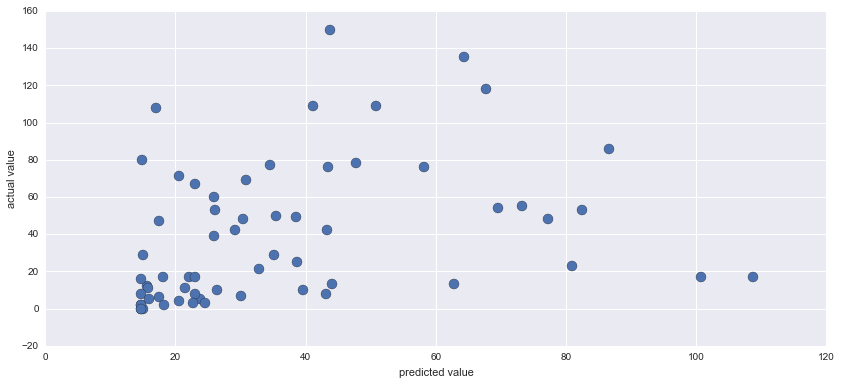

In [76]:
plt.scatter(lasso_model.predict(x_test), y_test, s=100)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

####This model shows a decent trend of data clustering around the one to one correlation with a handful of outliers.

###Q1. No matter how high I make alpha, the coefficient on crossing ("number of nearby crosswalks") never goes away. Try a simple linear regression on just that variable.

In [77]:
x = stations_vals[list(stations_vals.columns.values[111:112])]
y = stations_vals[list(stations_vals.columns.values[1:2])]
lin_regr = linear_model.LinearRegression()
lin_regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

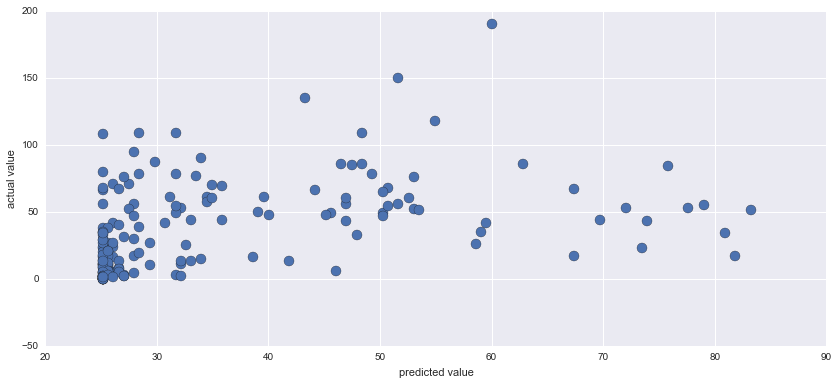

In [78]:
plt.scatter(lin_regr.predict(x), y, s=100)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

####This case is showing that a majority of the data is focused together in a small range but there are still a large number of points that deviate and show no sign of a trend or correlation.